# Dependencies

In [17]:
from manim import *
import numpy as np
import math
import matplotlib.pyplot as plt

from manim.mobject.graphing.scale import LogBase

In [18]:
def remove_invisible_chars(mobject: SVGMobject) -> SVGMobject:
    """Function to remove unwanted invisible characters from some mobjects.

    Parameters
    ----------
    mobject
        Any SVGMobject from which we want to remove unwanted invisible characters.

    Returns
    -------
    :class:`~.SVGMobject`
        The SVGMobject without unwanted invisible characters.
    """
    # TODO: Refactor needed
    iscode = False
    if mobject.__class__.__name__ == "Text":
        mobject = mobject[:]
    elif mobject.__class__.__name__ == "Code":
        iscode = True
        code = mobject
        mobject = mobject.code
    mobject_without_dots = VGroup()
    if mobject[0].__class__ == VGroup:
        for i in range(len(mobject)):
            mobject_without_dots.add(VGroup())
            mobject_without_dots[i].add(*(k for k in mobject[i] if k.__class__ != Dot))
    else:
        mobject_without_dots.add(*(k for k in mobject if k.__class__ != Dot))
    if iscode:
        code.code = mobject_without_dots
        return code
    return mobject_without_dots

# Motivation

In [19]:
A = np.round(np.random.rand(4,4), 1)
B = np.round(np.random.rand(4,4), 1)
C = np.round(A @ B, 1)

In [20]:
%%manim -qk -v WARNING Motivation

class Motivation(Scene):
    def construct(self):
        # Matrices
        A_mat = Matrix(A,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix(C,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix(B,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        VGroup(A_mat, B_mat, C_mat).scale(0.75).move_to(ORIGIN).shift(3*LEFT)

        colors = [BLUE, BLUE_C, BLUE_D, BLUE_E,
                GREEN, GREEN_C, GREEN_D, GREEN_E,
                YELLOW, YELLOW_C, YELLOW_D, YELLOW_E,
                RED, RED_C, RED_D, RED_E]
        threads = VGroup()
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    threads.add(Arrow(start=0.48*UP, end=0.48*DOWN, color=colors[i*4+j]))
                elif j == 0:
                    idx = (i-1)*4
                    threads.add(Arrow(start=0.48*UP, end=0.48*DOWN, color=colors[i*4+j]).next_to(threads[idx], DOWN))
                else:
                    idx = i*4 + j - 1
                    threads.add(Arrow(start=0.48*UP, end=0.48*DOWN, color=colors[i*4+j]).next_to(threads[idx], RIGHT).shift(0.5*RIGHT))
        
        block = SurroundingRectangle(threads, color=RED)
        thread_block = VGroup(block, threads)
        thread_block.next_to(C_mat, RIGHT).shift(2*RIGHT)

        block_y_axis = Arrow(start=1.5*UP, end=1.5*DOWN).next_to(block.get_edge_center(LEFT), LEFT)
        block_y_label = Tex(r"y-axis").scale(0.75).next_to(block_y_axis, LEFT)
        block_x_axis = Arrow(start=1.5*LEFT, end=1.5*RIGHT).next_to(block.get_edge_center(UP), UP)
        block_x_label = Tex(r"x-axis").scale(0.75).next_to(block_x_axis, UP)

        coalesced_code = Code(file_name="coalesced.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.6).to_edge(RIGHT).shift(2*UP)
        coalesced_code.code = remove_invisible_chars(coalesced_code.code)

        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]))
        self.wait(1)
        self.play(Create(thread_block), Create(VGroup(block_y_axis, block_y_label, block_x_axis, block_x_label)))
        self.wait(1)
        self.play(ReplacementTransform(VGroup(block_y_axis, block_y_label), coalesced_code.code[0]))
        self.wait(1)
        self.play(ReplacementTransform(VGroup(block_x_axis, block_x_label), coalesced_code.code[1]))
        self.wait(1)
        thread_animations = []
        for i in range(len(threads)):
            thread_animations.append(threads[i].animate.move_to(C_mat.get_entries()[i]))
        self.play(*thread_animations, FadeOut(block))
        self.wait(1)
        
        coalesced_objs = VGroup(C_mat[1:], threads)
        self.play(coalesced_objs.animate.shift(2.5*LEFT), 
                FadeOut(A_mat, B_mat),
                coalesced_code.code.animate.shift(7*LEFT))
        divider = Line(start=2.5*UP, end=2.5*DOWN)
        self.play(Create(divider))

        # Uncoalesced
        C_mat_ = Matrix(C,
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).scale(0.75).next_to(divider, RIGHT).shift(1.5*DOWN)

        threads_ = VGroup()
        for i in range(4):
            for j in range(4):
                if i == 0 and j == 0:
                    threads_.add(Arrow(start=0.12*UP, end=0.12*DOWN, color=colors[i*4+j]))
                elif j == 0:
                    idx = (i-1)*4
                    threads_.add(Arrow(start=0.12*UP, end=0.12*DOWN, color=colors[i*4+j]).next_to(threads_[idx], DOWN))
                else:
                    idx = i*4 + j - 1
                    threads_.add(Arrow(start=0.12*UP, end=0.12*DOWN, color=colors[i*4+j]).next_to(threads_[idx], RIGHT).shift(0.15*RIGHT))
        
        block_ = SurroundingRectangle(threads_, color=RED)
        thread_block_ = VGroup(block_, threads_)
        thread_block_.next_to(C_mat_, RIGHT).to_edge(RIGHT).shift(0.15*RIGHT)

        block_y_axis_ = Arrow(start=0.75*UP, end=0.75*DOWN).next_to(block_.get_edge_center(LEFT), LEFT)
        block_y_label_ = Tex(r"y-axis").scale(0.6).next_to(block_y_axis_, LEFT).shift(0.2*RIGHT)
        block_x_axis_ = Arrow(start=0.75*LEFT, end=0.6*RIGHT).next_to(block_.get_edge_center(UP), UP)
        block_x_label_ = Tex(r"x-axis").scale(0.75).next_to(block_x_axis_, UP).shift(0.2*DOWN)

        uncoalesced_code = Code(file_name="uncoalesced.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.6).to_edge(RIGHT).shift(2*UP)
        uncoalesced_code.code = remove_invisible_chars(uncoalesced_code.code)

        self.play(Create(C_mat_[1:]), Create(VGroup(thread_block_, block_y_axis_, block_y_label_, block_x_axis_, block_x_label_)))
        self.wait(1)
        self.play(ReplacementTransform(VGroup(block_y_axis_, block_y_label_, block_x_axis_, block_x_label_), uncoalesced_code.code))
        self.wait(1)

        thread_animations_ = []
        for i in range(4):
            for j in range(4):
                thread_animations_.append(threads_[i*4+j].animate.scale(1.75).move_to(C_mat_.get_entries()[j*4+i]))
        self.play(FadeOut(block_))
        for thread_anim in thread_animations_:
            self.play(thread_anim)
        self.wait(1)

        # Runtimes
        run_1 = Tex(r"3.6 seconds").next_to(uncoalesced_code, DOWN)
        run_0 = Tex(r"0.8 seconds").next_to(coalesced_code.code, DOWN)
        self.play(Write(run_1))
        self.wait(1)
        self.play(Write(run_0))
        self.wait(1)

        title = Title("Why 4x difference?")
        self.play(Write(title))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Global Memory

In [21]:
%%manim -qk -v WARNING GlobalMem

class GlobalMem(Scene):
    def generate_sm(self):
        cuda_cores = VGroup(Square(side_length=0.25, color=RED))
        for i in range(1, 16):
            if i % 4 == 0:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-4], DOWN))
            else:
                cuda_cores.add(Square(side_length=0.25, color=RED).next_to(cuda_cores[i-1], RIGHT))
        control_unit = Rectangle(width=1.9, height=0.5, color=GRAY).next_to(cuda_cores, UP)
        control_text = Tex(r"Control", color=GRAY).scale(0.75).move_to(control_unit)
        control = VGroup(control_unit, control_text) 
        SM_unit = SurroundingRectangle(VGroup(control, cuda_cores), buff=0.2, color=BLUE)
        SM_text = Tex(r"SM", color=BLUE).scale(0.75).next_to(SM_unit, UP)
        SM = VGroup(SM_unit, SM_text)

        return VGroup(SM, control, cuda_cores)

    def gen_block(self, x, y):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=GREEN_B).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def construct(self):
        title = Title("DRAM Technology")
        SM = self.generate_sm().scale(1).move_to(ORIGIN).to_edge(LEFT).shift(1*UP)
        global_mem_unit = Rectangle(width=9, height=1, color=GRAY_BROWN).next_to(SM, DOWN).shift(0.5*DOWN)
        global_mem_text = Tex(r"Off-chip Global Memory", color=GRAY_BROWN).scale(0.75).move_to(global_mem_unit)
        global_mem = VGroup(global_mem_unit, global_mem_text)
        VGroup(SM, global_mem).move_to(ORIGIN)
        self.play(Write(title))
        self.wait(1)
        self.play(Create(SM), Create(global_mem))
        self.wait(1)
        arrows = VGroup(Arrow(start=0.75*DOWN, end=0.75*UP, color=GREEN))
        for i in range(4):
            arrows.add(Arrow(start=0.75*DOWN, end=0.75*UP, color=GREEN).next_to(arrows[-1], RIGHT))
        arrows.move_to(global_mem_unit).shift(0.75*UP)
        self.play(Create(arrows[2]))
        self.wait(1)
        self.play(Create(arrows[0]), Create(arrows[1]), Create(arrows[3]), Create(arrows[4]))
        self.wait(1)
        data_chunks = VGroup(Square(side_length=1))
        for i in range(8):
            data_chunks.add(Square(side_length=1).next_to(data_chunks[-1], RIGHT).shift(0.25*LEFT))
        data_chunks.move_to(global_mem)
        self.play(FadeOut(arrows), ReplacementTransform(global_mem_text, data_chunks))
        self.wait(1)
        cr = Arrow(start=data_chunks[0].get_center(), end=SM[0][0].get_center())
        self.play(Create(cr))
        self.wait(1)
        self.play(FadeOut(cr))
        self.wait(1)
        title_ = Title("DRAM Burst")
        self.play(FadeOut(data_chunks[0], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[1], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[2], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[3], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[4], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[5], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[6], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[7], target_position=SM[0][0].get_center()),
                FadeOut(data_chunks[8], target_position=SM[0][0].get_center()))
        self.play(ReplacementTransform(title, title_))
        self.wait(1)
        title = Title("Thread Block")
        block = self.gen_block(8, 8).move_to(SM)
        self.play(ReplacementTransform(SM, block), ReplacementTransform(title_, title))
        self.wait(1)
        title_ = Title("1 Warp = 32 Threads")
        self.play(ReplacementTransform(title, title_))
        self.wait(1)
        self.play(FadeOut(block[0]), block[1].animate.scale(0.7).to_edge(LEFT))
        self.wait(1)
        self.play(block[1][8:16].animate.next_to(block[1][7], RIGHT))
        self.play(block[1][16:24].animate.next_to(block[1][15], RIGHT))
        self.play(block[1][24:32].animate.next_to(block[1][23], RIGHT))
        self.play(block[1][32:40].animate.next_to(block[1][31], RIGHT))
        self.play(block[1][40:48].animate.next_to(block[1][39], RIGHT))
        self.play(block[1][48:56].animate.next_to(block[1][47], RIGHT))
        self.play(block[1][56:64].animate.next_to(block[1][55], RIGHT))
        warp_0_box = SurroundingRectangle(block[1][:32])
        warp_0_text = Tex(r"Warp 0").next_to(warp_0_box, UP)
        self.play(Create(warp_0_box), Write(warp_0_text))
        self.wait(1)
        warp_1_box = SurroundingRectangle(block[1][32:])
        warp_1_text = Tex(r"Warp 1").next_to(warp_1_box, UP)
        self.play(Create(warp_1_box), Write(warp_1_text))
        self.wait(1)
        comment_1 = Tex(r"1 instruction for this entire warp").scale(0.75).next_to(warp_0_box, DOWN)
        comment_2 = Tex(r"1 instruction for this entire warp").scale(0.75).next_to(warp_1_box, DOWN)
        self.play(Write(comment_1), Write(comment_2))
        self.wait(1)
        self.play(FadeOut(comment_1, comment_2, block[1][32:], warp_0_box, warp_0_text, warp_1_box, warp_1_text))
        self.play(block[1][:32].animate.scale(2).move_to(ORIGIN))
        self.wait(1)
        comment_1 = Tex(r"Load").scale(2).next_to(block[1][:32], UP).shift(UP)
        self.play(Write(comment_1))
        self.wait(1)
        arrows = VGroup()
        data_chunks = VGroup(Square(side_length=0.17))
        for i in range(1, 32):
            data_chunks.add(Square(side_length=0.17).next_to(data_chunks[-1], RIGHT).shift(0.15*LEFT))
        data_chunks.move_to(global_mem)
        arrows = VGroup()
        for i in range(32):
            arrows.add(Arrow(start=block[1][i].get_edge_center(DOWN), end=data_chunks[i].get_edge_center(UP), color=GREEN, max_tip_length_to_length_ratio=0.1))
        self.play(Create(data_chunks), Create(arrows))
        self.wait(1)
        actions = []
        for i in range(32):
            actions.append(data_chunks[i].animate.move_to(block[1][i]))
        comment_2 = Tex(r"Parallel Load").scale(2).next_to(block[1][:32], UP).shift(UP)
        self.play(ReplacementTransform(comment_1, comment_2), FadeOut(arrows), *actions)
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Coalesced vs Uncoalesced

In [22]:
%%manim -qk -v WARNING Coalesced_MemAccess

class Coalesced_MemAccess(Scene):
    def gen_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def construct(self):
        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        colors = [BLUE, BLUE_C, BLUE_D, BLUE_E,
                GREEN, GREEN_C, GREEN_D, GREEN_E,
                YELLOW, YELLOW_C, YELLOW_D, YELLOW_E,
                RED, RED_C, RED_D, RED_E]

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.5).move_to(ORIGIN).to_edge(LEFT)

        block = self.gen_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)

        coalesced_code = Code(file_name="coalesced_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.3).to_edge(RIGHT).shift(2*UP)
        coalesced_code.code = remove_invisible_chars(coalesced_code.code)

        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]))
        self.wait(1)
        self.play(Create(block))
        self.wait(1)
        self.play(FadeOut(block[0]), Write(coalesced_code.code[:7]))
        self.wait(1)
        actions = []
        for (i, thread) in enumerate(block[1]):
            actions.append(thread.animate.move_to(C_mat.get_entries()[i]))
        self.play(*actions)
        self.wait(1)

        warp_0 = block[1][:4].copy()
        self.play(warp_0.animate.scale(3).next_to(C_mat, RIGHT).shift(RIGHT))
        self.wait(1)

        A_mem = A_mat.get_entries().copy()
        B_mem = B_mat.get_entries().copy()
        for i in range(4):
            if i == 0:
                self.play(A_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(UP), B_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(DOWN))
            else:
                self.play(A_mem[i*4:i*4+4].animate.next_to(A_mem[i*4-1], RIGHT).shift(0.1*LEFT), B_mem[i*4:i*4+4].animate.next_to(B_mem[i*4-1], RIGHT).shift(0.1*LEFT))
        self.wait(1)
        self.play(Write(coalesced_code.code[7:-4]))
        self.wait(1)
        # K = 0
        k0 = Tex(r"$k=0$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[0], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[0], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[1], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[2], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[3], color=BLUE_E)
        self.play(Write(k0), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[0], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][0]),
                FadeOut(b01, target_position=block[1][1]),
                FadeOut(b02, target_position=block[1][2]),
                FadeOut(b03, target_position=block[1][3]))
        self.wait(1)

        # K = 1
        k1 = Tex(r"$k=1$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[1], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[4], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[5], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[6], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[7], color=BLUE_E)
        self.play(ReplacementTransform(k0, k1), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[1], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i+4], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][4]),
                FadeOut(b01, target_position=block[1][5]),
                FadeOut(b02, target_position=block[1][6]),
                FadeOut(b03, target_position=block[1][7]))
        self.wait(1)

        # K = 2
        k2 = Tex(r"$k=2$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[2], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[8], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[9], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[10], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[11], color=BLUE_E)
        self.play(ReplacementTransform(k1, k2), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[2], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i+8], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][8]),
                FadeOut(b01, target_position=block[1][9]),
                FadeOut(b02, target_position=block[1][10]),
                FadeOut(b03, target_position=block[1][11]))
        self.wait(1)

        # K = 3
        k3 = Tex(r"$k=3$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[3], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[12], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[13], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[14], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[15], color=BLUE_E)
        self.play(ReplacementTransform(k2, k3), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[3], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[i+12], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0), FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][12]),
                FadeOut(b01, target_position=block[1][13]),
                FadeOut(b02, target_position=block[1][14]),
                FadeOut(b03, target_position=block[1][15]))
        self.wait(1)
        self.play(Write(coalesced_code.code[-4:]),
                ReplacementTransform(block[1][0], C_mat.get_entries()[0]),
                ReplacementTransform(block[1][1], C_mat.get_entries()[1]),
                ReplacementTransform(block[1][2], C_mat.get_entries()[2]),
                ReplacementTransform(block[1][3], C_mat.get_entries()[3]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

In [23]:
%%manim -qk -v WARNING Uncoalesced_MemAccess

class Uncoalesced_MemAccess(Scene):
    def gen_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 

    def construct(self):
        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        colors = [BLUE, BLUE_C, BLUE_D, BLUE_E,
                GREEN, GREEN_C, GREEN_D, GREEN_E,
                YELLOW, YELLOW_C, YELLOW_D, YELLOW_E,
                RED, RED_C, RED_D, RED_E]

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.5).move_to(ORIGIN).to_edge(LEFT)

        block = self.gen_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)
        block_ = self.gen_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)

        uncoalesced_code = Code(file_name="uncoalesced_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.3).to_edge(RIGHT).shift(2*UP)
        uncoalesced_code.code = remove_invisible_chars(uncoalesced_code.code)

        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]), Create(block))
        self.wait(1)
        self.play(FadeOut(block[0]), Write(uncoalesced_code.code[:7]))
        self.wait(1)
        for i in range(4):
            for j in range(4):
                self.play(block[1][i*4+j].animate.move_to(C_mat.get_entries()[j*4+i]))
        self.wait(1)

        warp_0 = block_[1][:4].copy().scale(3).next_to(C_mat, RIGHT).shift(RIGHT)
        box = SurroundingRectangle(block[1][:4])
        self.play(Create(box))
        self.wait(1)
        self.play(ReplacementTransform(box, warp_0))
        self.wait(1)

        A_mem = A_mat.get_entries().copy()
        B_mem = B_mat.get_entries().copy()
        for i in range(4):
            if i == 0:
                self.play(A_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(UP), B_mem[i*4:i*4+4].animate.next_to(C_mat, RIGHT).shift(DOWN))
            else:
                self.play(A_mem[i*4:i*4+4].animate.next_to(A_mem[i*4-1], RIGHT).shift(0.1*LEFT), B_mem[i*4:i*4+4].animate.next_to(B_mem[i*4-1], RIGHT).shift(0.1*LEFT))
        self.wait(1)
        self.play(Write(uncoalesced_code.code[7:-4]))
        self.wait(1)
        # K = 0
        k0 = Tex(r"$k=0$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(B_mat.get_entries()[0], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[0], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[4], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[8], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[12], color=BLUE_E)
        self.play(Write(k0), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[0], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)

        # K = 1
        k1 = Tex(r"$k=1$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(B_mat.get_entries()[4], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[1], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[5], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[9], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[13], color=BLUE_E)
        self.play(ReplacementTransform(k0, k1), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4+1], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[4], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)

        # K = 2
        k2 = Tex(r"$k=2$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(B_mat.get_entries()[8], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[2], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[6], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[10], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[14], color=BLUE_E)
        self.play(ReplacementTransform(k1, k2), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4+2], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[8], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)

        # K = 3
        k3 = Tex(r"$k=3$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(B_mat.get_entries()[12], color=BLUE_E)
        b00 = SurroundingRectangle(A_mat.get_entries()[3], color=BLUE)
        b01 = SurroundingRectangle(A_mat.get_entries()[7], color=BLUE_C)
        b02 = SurroundingRectangle(A_mat.get_entries()[11], color=BLUE_D)
        b03 = SurroundingRectangle(A_mat.get_entries()[15], color=BLUE_E)
        self.play(ReplacementTransform(k2, k3), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        box_a00 = VGroup()
        line_a00 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_a00.add(SurroundingRectangle(A_mem[i*4+3], color=colors[i]))
            line_a00.add(Line(start=thread.get_center(), end=box_a00[-1].get_edge_center(DOWN)))
        box_b0 = VGroup()
        line_b0 = VGroup()
        for (i, thread) in enumerate(warp_0):
            box_b0.add(SurroundingRectangle(B_mem[12], color=colors[i]))
            line_b0.add(Line(start=thread.get_center(), end=box_b0[-1].get_edge_center(UP)))
        self.play(Create(box_a00), Create(box_b0), Create(line_a00), Create(line_b0))
        self.wait(1)
        self.play(FadeOut(box_a00, box_b0, line_a00, line_b0))
        self.play(FadeOut(a00, target_position=block[1][:4]))
        self.play(FadeOut(b00, target_position=block[1][0]))
        self.play(FadeOut(b01, target_position=block[1][1]))
        self.play(FadeOut(b02, target_position=block[1][2]))
        self.play(FadeOut(b03, target_position=block[1][3]))
        self.wait(1)
        self.play(Write(uncoalesced_code.code[-4:]),
                ReplacementTransform(block[1][0], C_mat.get_entries()[0]),
                ReplacementTransform(block[1][1], C_mat.get_entries()[4]),
                ReplacementTransform(block[1][2], C_mat.get_entries()[8]),
                ReplacementTransform(block[1][3], C_mat.get_entries()[12]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

Manim Community v0.18.1

# Conclusion

In [24]:
%%manim -qk -v WARNING Conclusion

class Conclusion(Scene):
    def gen_block(self, x, y, colors):
        gpu_threads = VGroup()
        for i in range(y):
            for j in range(x):
                if i == 0 and j == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1))
                elif (i*x+j) % x == 0:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-x], DOWN))#.shift(0.55*UP))
                else:
                    gpu_threads.add(Circle(radius=0.02, color=colors[i*x+j], fill_opacity=1).next_to(gpu_threads[-1], RIGHT))#.shift(0.55*LEFT))

        block_unit = SurroundingRectangle(gpu_threads, color=RED, buff=0.2)
        return VGroup(block_unit, gpu_threads) 
        
    def construct(self):
        # Matrices
        A_mat = Matrix([
            ["a_{0,0}", "a_{0,1}", "a_{0,2}", "a_{0,3}"],
            ["a_{1,0}", "a_{1,1}", "a_{1,2}", "a_{1,3}"],
            ["a_{2,0}", "a_{2,1}", "a_{2,2}", "a_{2,3}"],
            ["a_{3,0}", "a_{3,1}", "a_{3,2}", "a_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1)
        
        C_mat = Matrix([
            ["c_{0,0}", "c_{0,1}", "c_{0,2}", "c_{0,3}"],
            ["c_{1,0}", "c_{1,1}", "c_{1,2}", "c_{1,3}"],
            ["c_{2,0}", "c_{2,1}", "c_{2,2}", "c_{2,3}"],
            ["c_{3,0}", "c_{3,1}", "c_{3,2}", "c_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(A_mat, RIGHT)

        B_mat = Matrix([
            ["b_{0,0}", "b_{0,1}", "b_{0,2}", "b_{0,3}"],
            ["b_{1,0}", "b_{1,1}", "b_{1,2}", "b_{1,3}"],
            ["b_{2,0}", "b_{2,1}", "b_{2,2}", "b_{2,3}"],
            ["b_{3,0}", "b_{3,1}", "b_{3,2}", "b_{3,3}"]
        ],
        left_bracket="[",
        right_bracket="]",
        element_to_mobject=MathTex,
        element_alignment_corner=ORIGIN,
        v_buff=1,
        h_buff=1).next_to(C_mat, UP)

        colors = [BLUE, BLUE_C, BLUE_D, BLUE_E,
                GREEN, GREEN_C, GREEN_D, GREEN_E,
                YELLOW, YELLOW_C, YELLOW_D, YELLOW_E,
                RED, RED_C, RED_D, RED_E]

        matrices = VGroup(A_mat, B_mat, C_mat).scale(0.5).move_to(ORIGIN).to_edge(LEFT)

        block = self.gen_block(4, 4, colors).scale(1.5).next_to(C_mat, RIGHT)

        coalesced_code = Code(file_name="coalesced_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.3).to_edge(RIGHT).shift(2*UP)
        coalesced_code.code = remove_invisible_chars(coalesced_code.code)

        self.play(Create(A_mat), Create(B_mat), Create(C_mat[1:]), Create(block))
        actions = []
        for (i, thread) in enumerate(block[1]):
            actions.append(thread.animate.move_to(C_mat.get_entries()[i]))
        self.play(*actions, FadeOut(block[0]))
        self.wait(1)

        title = Title("Coalesced Memory Access")
        self.play(Write(title))

        # K = 0
        k0 = Tex(r"$k=0$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[0], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[0], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[1], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[2], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[3], color=BLUE_E)
        self.play(Write(k0), Create(VGroup(a00, b00, b01, b02, b03)))
        self.play(FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][0]),
                FadeOut(b01, target_position=block[1][1]),
                FadeOut(b02, target_position=block[1][2]),
                FadeOut(b03, target_position=block[1][3]))

        # K = 1
        k1 = Tex(r"$k=1$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[1], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[4], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[5], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[6], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[7], color=BLUE_E)
        self.play(ReplacementTransform(k0, k1), Create(VGroup(a00, b00, b01, b02, b03)))
        self.play(FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][4]),
                FadeOut(b01, target_position=block[1][5]),
                FadeOut(b02, target_position=block[1][6]),
                FadeOut(b03, target_position=block[1][7]))

        # K = 2
        k2 = Tex(r"$k=2$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[2], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[8], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[9], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[10], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[11], color=BLUE_E)
        self.play(ReplacementTransform(k1, k2), Create(VGroup(a00, b00, b01, b02, b03)))
        self.wait(1)
        self.play(FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][8]),
                FadeOut(b01, target_position=block[1][9]),
                FadeOut(b02, target_position=block[1][10]),
                FadeOut(b03, target_position=block[1][11]))

        # K = 3
        k3 = Tex(r"$k=3$").scale(2).next_to(B_mat, LEFT).to_edge(LEFT)
        a00 = SurroundingRectangle(A_mat.get_entries()[3], color=BLUE_E)
        b00 = SurroundingRectangle(B_mat.get_entries()[12], color=BLUE)
        b01 = SurroundingRectangle(B_mat.get_entries()[13], color=BLUE_C)
        b02 = SurroundingRectangle(B_mat.get_entries()[14], color=BLUE_D)
        b03 = SurroundingRectangle(B_mat.get_entries()[15], color=BLUE_E)
        self.play(ReplacementTransform(k2, k3), Create(VGroup(a00, b00, b01, b02, b03)))
        self.play(FadeOut(a00, target_position=block[1][:4]),
                FadeOut(b00, target_position=block[1][12]),
                FadeOut(b01, target_position=block[1][13]),
                FadeOut(b02, target_position=block[1][14]),
                FadeOut(b03, target_position=block[1][15]))
        self.play(ReplacementTransform(block[1][0], C_mat.get_entries()[0]),
                ReplacementTransform(block[1][1], C_mat.get_entries()[1]),
                ReplacementTransform(block[1][2], C_mat.get_entries()[2]),
                ReplacementTransform(block[1][3], C_mat.get_entries()[3]))
        self.wait(1)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)

        # Code
        kernel_code = Code(file_name="coalesced_kernel.cu", language="CUDA", font="Monospace", insert_line_no=False,
                            style="dracula", line_spacing=1).scale(0.5)
        kernel_code.code = remove_invisible_chars(kernel_code.code)
        self.play(FadeIn(kernel_code.code))
        self.wait(1)
        self.play(kernel_code.code.animate.scale(0.75).to_edge(RIGHT))
        self.wait(1)

        mem_access_1 = SurroundingRectangle(kernel_code.code[16][7:17], color=RED)
        mem_access_2 = SurroundingRectangle(kernel_code.code[16][18:-1], color=RED)
        op_1 = SurroundingRectangle(kernel_code.code[16][5:7], color=BLUE)
        op_2 = SurroundingRectangle(kernel_code.code[16][17], color=BLUE)

        FLOP_B = Tex(r"Floating-point Operations per Byte accessed \\", r"$2/8$", r"$=$", r"$0.25$ FLOP/B").scale(0.75).to_edge(LEFT).shift(2*UP)
        mem_band = Tex(r"Peak Memory Bandwidth \\", r"936.2 GB/s").scale(0.75).next_to(FLOP_B, DOWN)
        comment_4 = Tex(r"GPU can move 936.2 GB of data in 1 second!").scale(0.5).next_to(mem_band, DOWN)
        eq_1 = Tex(r"$0.25$", r"$\times$", r"$936.2$", r"$= 234.05$ GFLOPS").scale(0.75).next_to(comment_4, DOWN)
        comment_5 = Tex(r"RTX 3090 is capable of 35,580 GFLOPS").scale(0.75).next_to(eq_1, DOWN)
        
        self.play(Create(VGroup(mem_access_1, mem_access_2)))
        self.wait(1)
        self.play(ReplacementTransform(VGroup(mem_access_1, mem_access_2), FLOP_B[1][2]))
        self.wait(1)
        self.play(Create(VGroup(op_1, op_2)))
        self.wait(1)
        self.play(ReplacementTransform(VGroup(op_1, op_2), FLOP_B[1][0]))
        self.wait(1)
        self.play(Write(FLOP_B[0]), Write(FLOP_B[1][1]), Write(FLOP_B[2:]))
        self.wait(1)
        self.play(Write(mem_band))
        self.wait(1)
        self.play(Write(comment_4))
        self.wait(1)
        self.play(FadeOut(comment_4), ReplacementTransform(FLOP_B[-1], eq_1[0]))
        self.wait(1)
        self.play(ReplacementTransform(mem_band[-1], eq_1[2]))
        self.wait(1)
        self.play(Write(eq_1[1]), Write(eq_1[3]))
        self.wait(1)
        self.play(Write(comment_5))
        self.wait(1)
        title = Title("Kernel using only 0.65\% of maximum compute capacity")
        self.play(FadeOut(mem_band, eq_1, comment_5, FLOP_B[1:3], FLOP_B[0]), Write(title), kernel_code.code.animate.scale(1.25).next_to(title, DOWN))
        self.wait(1)

        title_ = Title("Next Video: Using Shared Memory to increase FLOP/B!")
        self.play(ReplacementTransform(title, title_))
        self.wait(1)

        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(1)
        self.wait(2)
        dialogue = Tex("Like", " and please do leave a", " Comment", "!").scale(1.25)
        dialogue[0].set_color(RED)
        dialogue[-2].set_color(GREEN)
        self.play(Write(dialogue))
        self.wait(2)
        self.play(
            *[FadeOut(mob)for mob in self.mobjects]
        )
        self.wait(2)

Manim Community v0.18.1

# Thumbnail

Manim Community v0.18.1

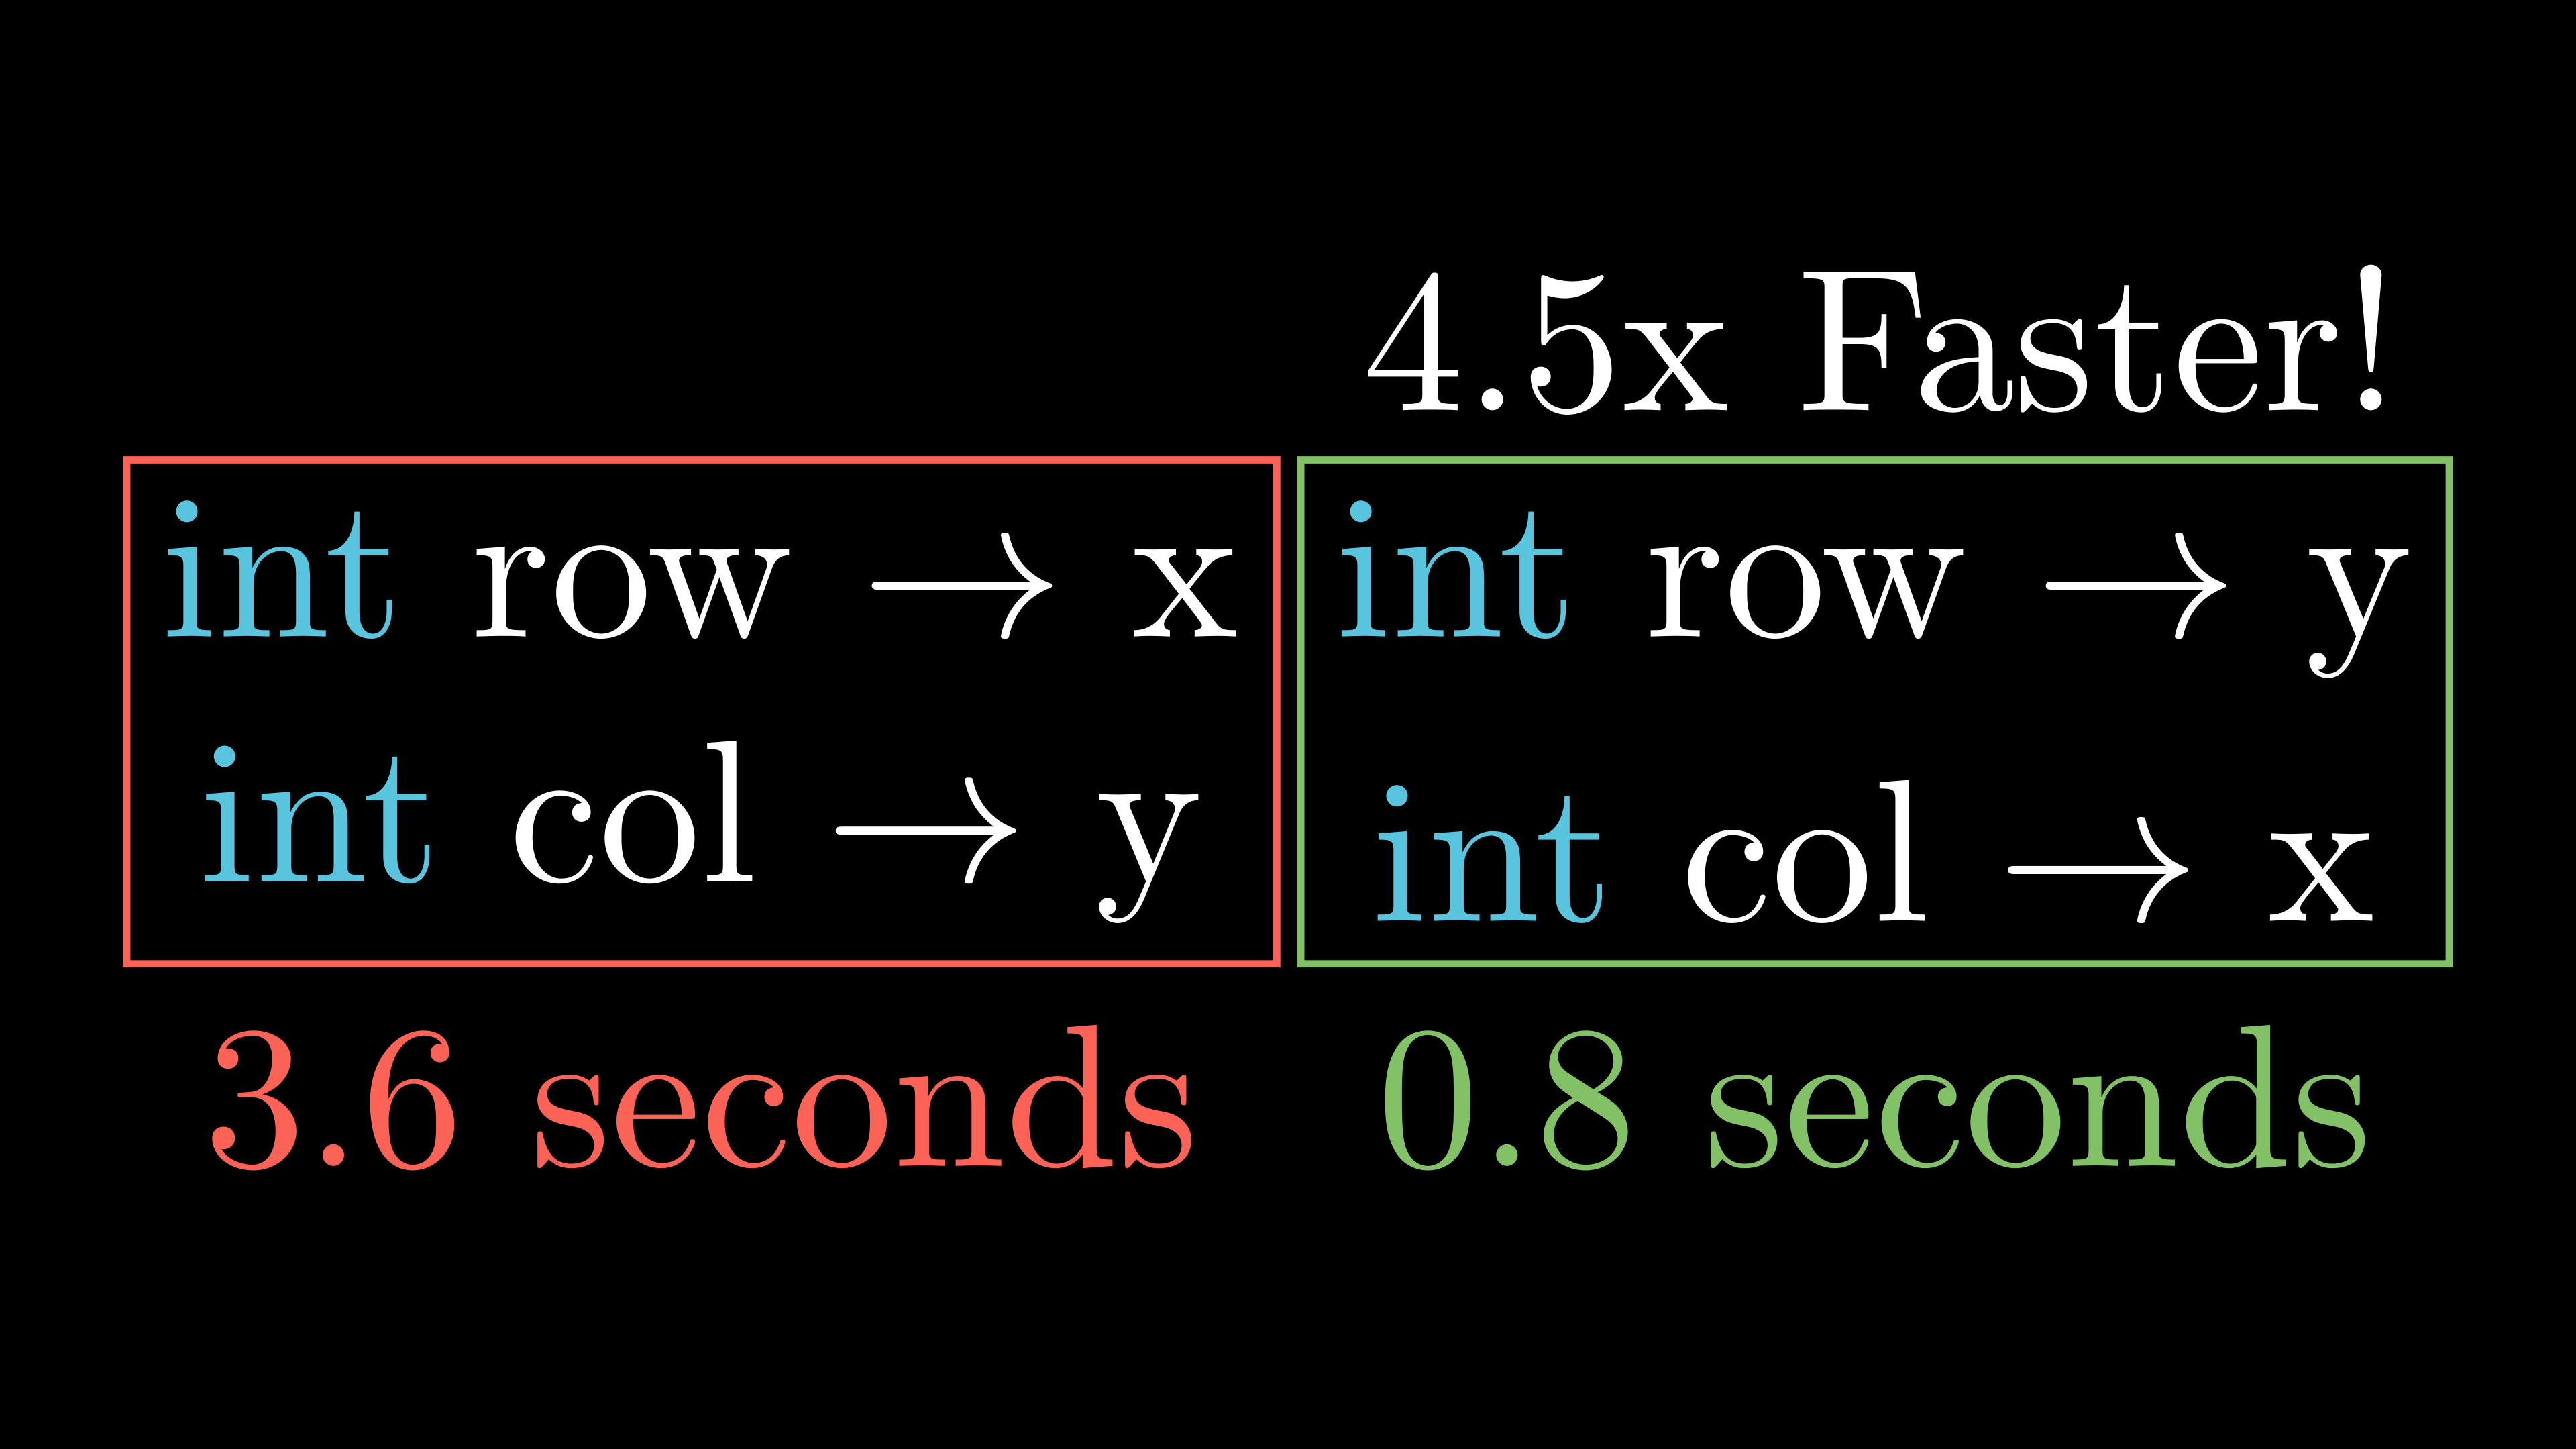

In [41]:
%%manim -qk -v WARNING Thumbnail

class Thumbnail(Scene):
    def construct(self):
        a1 = Tex(r"int row $\rightarrow$ x")
        a1[0][:3].color = BLUE
        a2 = Tex(r"int col $\rightarrow$ y").next_to(a1, DOWN)
        a2[0][:3].color = BLUE
        ta = Tex(r"3.6 seconds", color=RED).next_to(a2, DOWN)
        box_a = SurroundingRectangle(VGroup(a1, a2), color=RED)
        a = VGroup(a1, a2, box_a, ta).scale(2.25).move_to(ORIGIN).to_edge(LEFT).shift(0.2*RIGHT+0.5*DOWN)

        b1 = Tex(r"int row $\rightarrow$ y")
        b1[0][:3].color = BLUE
        b2 = Tex(r"int col $\rightarrow$ x").next_to(b1, DOWN)
        b2[0][:3].color = BLUE
        tb = Tex(r"0.8 seconds", color=GREEN).next_to(b2, DOWN)
        box_b = SurroundingRectangle(VGroup(b1, b2), color=GREEN)
        b = VGroup(b1, b2, box_b, tb).scale(2.25).move_to(ORIGIN).to_edge(RIGHT).shift(0.2*LEFT+0.5*DOWN)

        comment = Tex(r"4.5x Faster!").scale(2.25).next_to(box_b, UP)

        self.add(a, b, comment)